<a href="https://colab.research.google.com/github/ezhilsaka/nucamp/blob/main/SQL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

con = sqlite3.connect('sakila.db')

def sql_to_df(sql_query):
    df = pd.read_sql(sql_query, con)
    return df

In [2]:
query = '''
    SELECT
        strftime('%Y-%m', payment_date) AS Date, ROUND(SUM(amount), 0) AS Sales
    FROM payment
    GROUP BY Date
    ORDER BY Date ASC;
'''

sales_per_month = sql_to_df(query)
sales_per_month

,Date,Sales
0,2005-05,4824.0
1,2005-06,9632.0
2,2005-07,28374.0
3,2005-08,24072.0
4,2006-02,514.0


<Axes: xlabel='Date'>

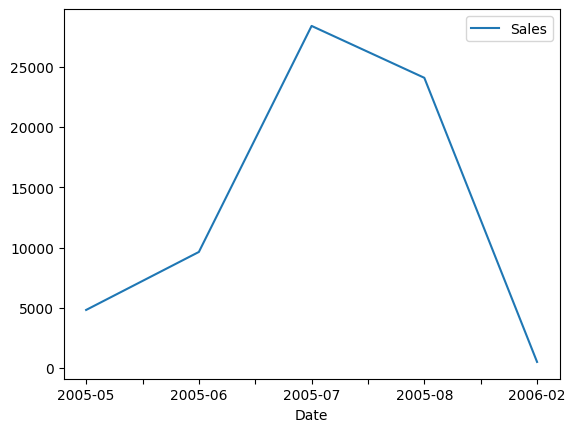

In [3]:
sales_per_month = sales_per_month.set_index("Date")
sales_per_month.plot()

<Axes: xlabel='Date'>

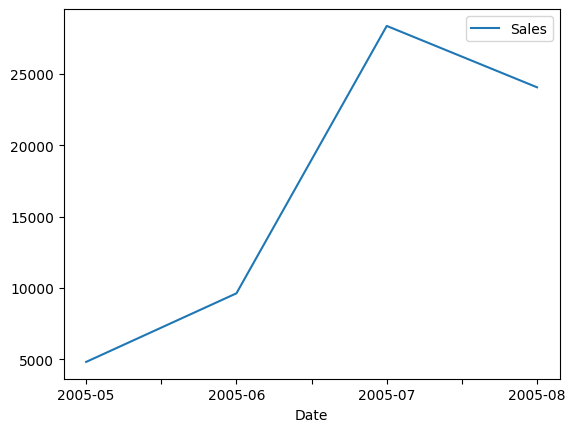

In [4]:
sales_per_month = sales_per_month.iloc[0:4]
sales_per_month.plot()

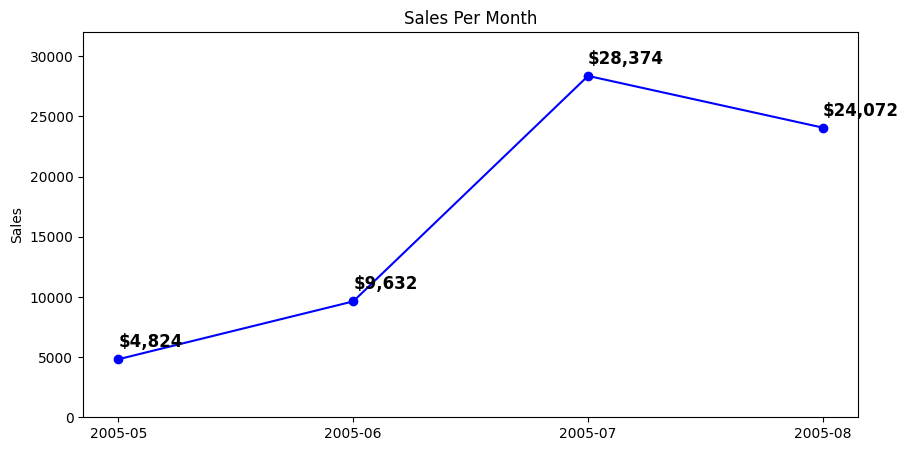

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sales_per_month, "bo-")
ax.set_ylim(ymin=0, ymax=32000)
ax.set_title("Sales Per Month")
ax.set_ylabel("Sales")
for date, sales in sales_per_month["Sales"].items():
    ax.annotate(str("${:,.0f}".format(sales)),
        xy=(date, sales+1000),
        fontweight="semibold",
        fontsize=12)

plt.show()

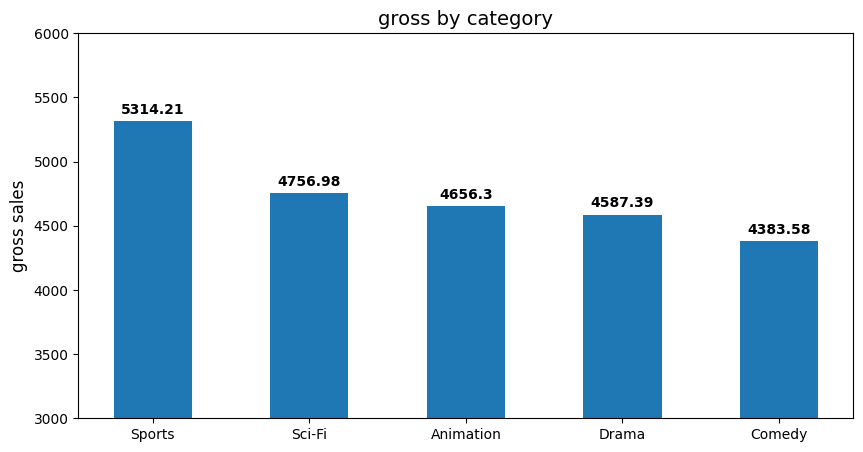

In [6]:
query = '''
    SELECT
        cat.name category_name,
        sum( IFNULL(pay.amount, 0) ) revenue
    FROM category cat
    LEFT JOIN film_category flm_cat
    ON cat.category_id = flm_cat.category_id
    LEFT JOIN film fil
    ON flm_cat.film_id = fil.film_id
    LEFT JOIN inventory inv
    ON fil.film_id = inv.film_id
    LEFT JOIN rental ren
    ON inv.inventory_id = ren.inventory_id
    LEFT JOIN payment pay
    ON ren.rental_id = pay.rental_id
    GROUP BY cat.name
    ORDER BY revenue DESC
    limit 5;
'''

categories_by_gross = sql_to_df(query)
categories_by_gross

fig, ax = plt.subplots(figsize=(10, 5))

ypos = np.arange(len(categories_by_gross["revenue"]))
bars = ax.bar(ypos, categories_by_gross["revenue"].round(3), width=0.50)
ax.set_xticks(ypos)
ax.set_xticklabels(categories_by_gross["category_name"])
ax.set_ylim(ymin=3000, ymax=6000)
ax.set_title("gross by category", fontsize=14)
ax.set_ylabel("gross sales", fontsize=12)

for bar in bars:  # add data labels
    height = bar.get_height()
    ax.annotate(f"{height}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha="center", va="bottom",
                fontweight="semibold")

plt.show()

[0.1 0.  0.  0.  0. ]


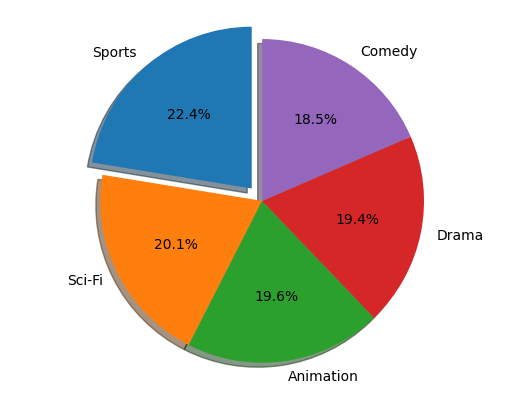

In [7]:
explode = np.zeros(len(categories_by_gross["category_name"]))
explode[0] = 0.1
print(explode)

fig, ax = plt.subplots()
ax.pie(categories_by_gross["revenue"].round(3), explode=explode, labels=categories_by_gross["category_name"], 
       autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [8]:
query = '''
    SELECT
        COUNT(title) AS Count,
        rating AS Rating
    FROM film
    WHERE description
    LIKE '%Pastry%'
    GROUP BY rating
    ORDER BY Count DESC;
'''

df = sql_to_df(query)
df.set_index('Rating', inplace=True)

num_adult_pastry = df.loc['NC-17', 'Count']
total = df['Count'].sum()
labels = ['all other', 'adult pastry']
nums = np.array([total, num_adult_pastry])
nums

array([79, 17])

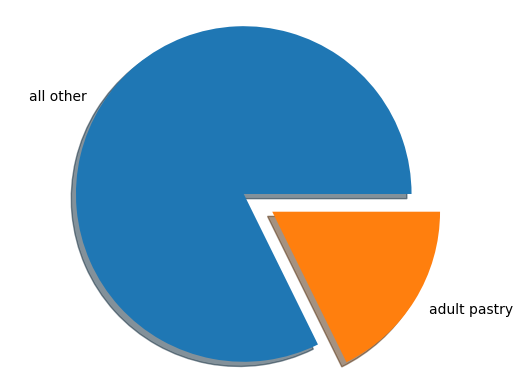

In [9]:
explode = [0, 0.2]

fig, ax = plt.subplots()
ax.pie(nums, labels=labels, explode=explode, shadow=True)
ax.axis('equal')

plt.show()